In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X,y = make_regression(n_samples=200, n_features=1, noise=15, random_state=1)
X =torch.from_numpy(X).float()
y = torch.from_numpy(y).float().unsqueeze(1)
print(X[:10],y[:10],sep="\n")

tensor([[ 0.2325],
        [-0.0387],
        [ 0.5505],
        [ 0.5032],
        [ 2.1870],
        [-0.0731],
        [-0.2679],
        [-1.6274],
        [ 0.5304],
        [ 0.1694]])
tensor([[  31.7692],
        [  -8.7781],
        [  68.9898],
        [  40.7884],
        [ 180.3602],
        [ -11.4543],
        [ -54.3609],
        [-143.1753],
        [  39.0467],
        [  28.8165]])


In [3]:
def visualize_data(x_train,y_train,x_test,y_test,predictions=None):
    plt.scatter(x_train.numpy(), y_train.numpy(), c="c", label="train data")
    plt.scatter(x_test.numpy(), y_test.numpy(), c="m", label="test data")
    if predictions is not None:
        plt.scatter(x_test.numpy(), predictions, c="b", label="predictions")
    plt.legend()
    plt.show()

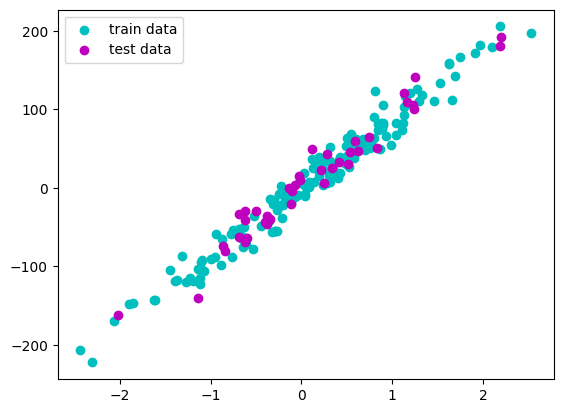

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
visualize_data(X_train, y_train, X_test, y_test)

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [6]:
def trainer(epochs:int, model:nn.Module, loss_fn:nn.Module, optimizer:torch.optim.Optimizer, X_train:torch.Tensor, y_train:torch.Tensor)->None:
    model.train(True)
    for epoch in range(epochs):
        predictions = model(X_train)
        loss =loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 5== 0:
            print(f"Epoch: {epoch} | Loss: {loss}")

In [7]:
model = LinearRegressionModel()

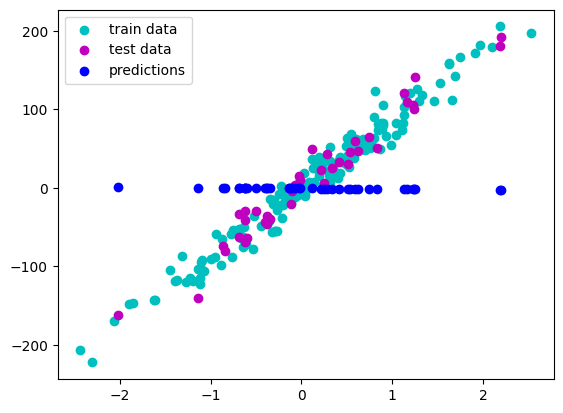

In [8]:
with torch.inference_mode():
    predictions = model(X_test)
    visualize_data(X_train, y_train, X_test, y_test, predictions)

In [9]:
learning_rate = 0.1
loss_fn= nn.L1Loss()
optimize=torch.optim.Adam(model.parameters(),lr=learning_rate)
trainer(epochs=1000, model=model, loss_fn=loss_fn, optimizer=optimize, X_train=X_train, y_train=y_train)

Epoch: 0 | Loss: 65.891845703125
Epoch: 5 | Loss: 65.45024108886719
Epoch: 10 | Loss: 65.00863647460938
Epoch: 15 | Loss: 64.56703186035156
Epoch: 20 | Loss: 64.13609313964844
Epoch: 25 | Loss: 63.71095657348633
Epoch: 30 | Loss: 63.2896728515625
Epoch: 35 | Loss: 62.875450134277344
Epoch: 40 | Loss: 62.46885299682617
Epoch: 45 | Loss: 62.06563186645508
Epoch: 50 | Loss: 61.66670608520508
Epoch: 55 | Loss: 61.27387619018555
Epoch: 60 | Loss: 60.88233184814453
Epoch: 65 | Loss: 60.492164611816406
Epoch: 70 | Loss: 60.119384765625
Epoch: 75 | Loss: 59.75037384033203
Epoch: 80 | Loss: 59.382904052734375
Epoch: 85 | Loss: 59.01622772216797
Epoch: 90 | Loss: 58.64990997314453
Epoch: 95 | Loss: 58.2852897644043
Epoch: 100 | Loss: 57.92383575439453
Epoch: 105 | Loss: 57.565216064453125
Epoch: 110 | Loss: 57.20707321166992
Epoch: 115 | Loss: 56.84916305541992
Epoch: 120 | Loss: 56.4913330078125
Epoch: 125 | Loss: 56.13347244262695
Epoch: 130 | Loss: 55.77555465698242
Epoch: 135 | Loss: 55.4175

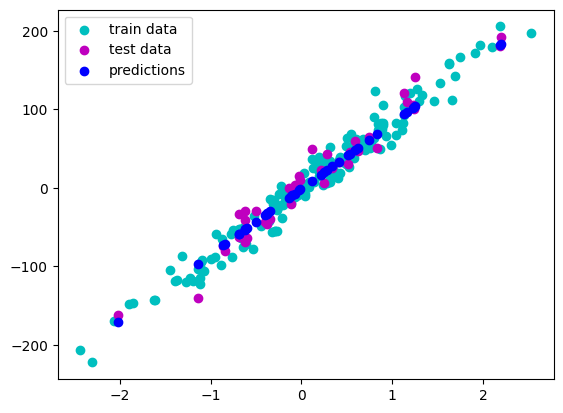

In [10]:
with torch.inference_mode():
    predictions = model(X_test)
    visualize_data(X_train, y_train, X_test, y_test, predictions)

In [11]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[83.7369]])),
             ('linear.bias', tensor([-0.9126]))])